In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calmap

In [260]:

def correlacion(ejex, ejey, df,name):
    #Calculamos promedio y variacion estandar para remover outliers
    mean = df.mean(axis=0)[{ejey,ejex}]
    std = df.std(axis=0)[{ejey,ejex}]


    #Filtro de outliers
    df = df.drop(df[(abs(df[ejey]-mean[ejey]) >= 2*std[ejey]) | (abs(df[ejex]-mean[ejex]) >= 2*std[ejex])].index)


    #Grafico de correlacion
    ax = sns.lmplot(x=ejex, y=ejey, data=df)


    #regplot
    
    plt.xlabel("{}".format(ejex));
    plt.ylabel("{}".format(ejey));
    r= np.corrcoef(df[ejex], df[ejey])[0, 1];
    plt.figtext(0.2,0,s=name+"Coeficiente de Pearson: r="+str(r))
    
 
    plt.savefig('../graficos/correlacion/correlacion{}-{}-{}.png'.format(name, ejex, ejey))

In [261]:
#Cargado de archivos
dia = pd.read_csv('../results/dia/info_dia1998-2008.csv', sep=',')
pares = pd.read_csv('../results/pares-ciudades/info-pares-ciudades1998-2008.csv', sep=',')
aeropuerto = pd.read_csv("../results/aeropuerto/aeropuertos1998-2008.csv" ,sep=',')
aerolinea = pd.read_csv("../results/aerolinea/aerolinea1998-2008.csv" ,sep=',')
dia.name="dia"
pares.name="pares"
aeropuerto.name="aeropuerto"
aerolinea.name="aerolinea"

In [262]:
#Creamos columnas con %cancelados y otp.
dia["cancel"] = dia["vuelos_cancelados"].astype(float) / dia["vuelos_totales"].astype(float)
dia["otp"] = (dia["atrasos_totales_salida"]+dia["atrasos_totales_arribo"].astype(float)) / (2 * dia["vuelos_totales"].astype(float)) 

pares["cancel"] = pares["vuelos_cancelados"].astype(float) / pares["vuelos_totales"].astype(float)
pares["otp"] = (pares["atrasos_totales_salida"]+pares["atrasos_totales_arribo"].astype(float)) / (2 * pares["vuelos_totales"].astype(float)) 

aeropuerto["cancel"] = aeropuerto["vuelos_cancelados"].astype(float) / aeropuerto["vuelos_totales"].astype(float)
aeropuerto["otp"] = aeropuerto["atrasos_totales"].astype(float) / aeropuerto["vuelos_totales"].astype(float) 

aerolinea["cancel"] = aerolinea["vuelos_cancelados"].astype(float) / aerolinea["vuelos_totales"].astype(float)
aerolinea["otp"] = (aerolinea["atrasos_totales_salida"]+aerolinea["atrasos_totales_arribo"].astype(float)) / (2 * aerolinea["vuelos_totales"].astype(float)) 


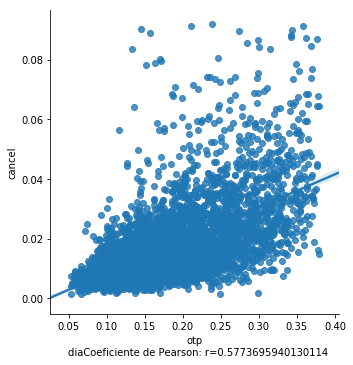

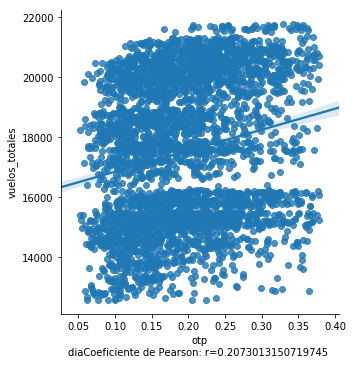

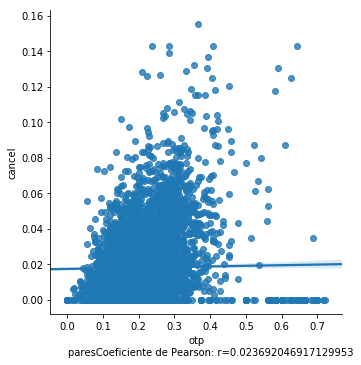

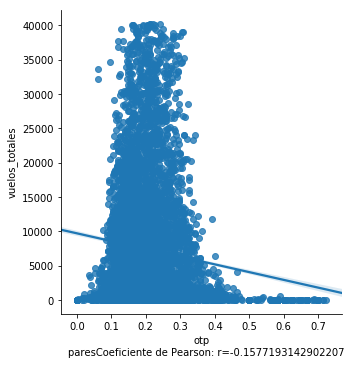

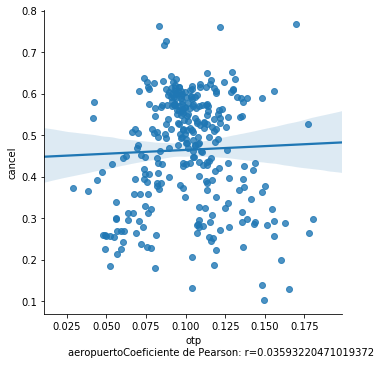

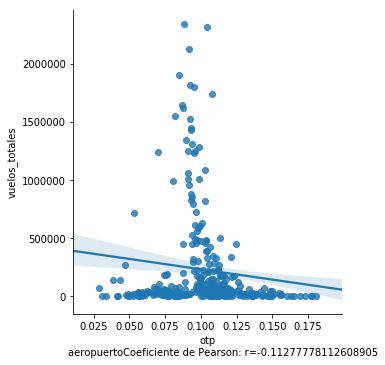

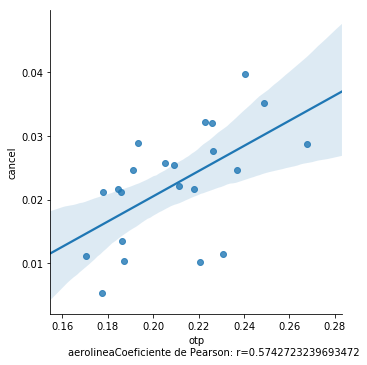

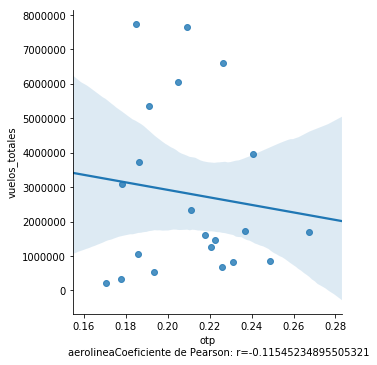

In [263]:
correlacion("otp", "cancel", dia, "dia")
correlacion("otp", "vuelos_totales", dia, "dia")

correlacion("otp","cancel",pares, "pares")
correlacion("otp","vuelos_totales",pares, "pares")

correlacion("otp","cancel",aeropuerto, "aeropuerto")
correlacion("otp","vuelos_totales",aeropuerto, "aeropuerto")

correlacion("otp","cancel",aerolinea, "aerolinea")
correlacion("otp","vuelos_totales",aerolinea, "aerolinea")



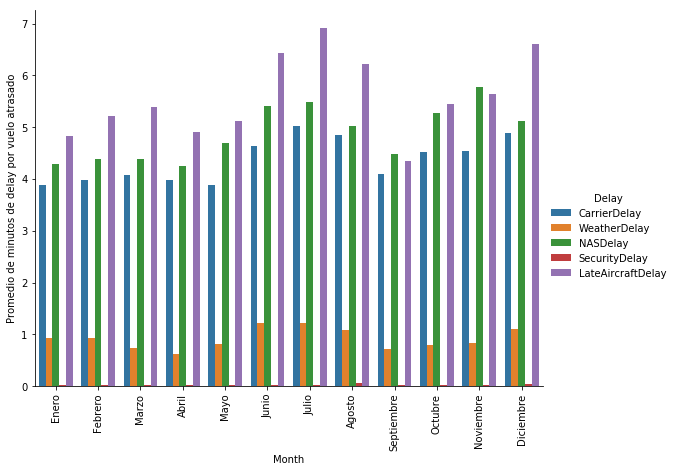

In [26]:
#Grafico retraso por meses
# Load dataframe.
mes = pd.read_csv('../results/mes/info-mes1998-2008.csv', sep=',')

#Create month column and groupby it
mes['fecha'] = "1/"+mes['fecha']
mes['fecha'] = pd.to_datetime(mes['fecha'],errors='coerce', format = '%d/%m/%Y')
mes['vuelos_atrasados'] = mes['atrasos_totales_arribo'] + mes['atrasos_totales_salida']
mes['Month'] = mes['fecha'].dt.month


aux = mes.groupby(by='Month', as_index=False).sum()[['Month','vuelos_atrasados','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]


# mean for each type of delay
aux['CarrierDelay'] = aux['CarrierDelay']/aux['vuelos_atrasados']
aux['WeatherDelay'] = aux['WeatherDelay']/aux['vuelos_atrasados']
aux['NASDelay'] = aux['NASDelay']/aux['vuelos_atrasados']
aux['SecurityDelay'] = aux['SecurityDelay']/aux['vuelos_atrasados']
aux['LateAircraftDelay'] = aux['LateAircraftDelay']/aux['vuelos_atrasados']


del aux['vuelos_atrasados']
aux['Month']=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre','Noviembre', 'Diciembre']
aux = aux.melt('Month', var_name='Delay', value_name='Promedio')


# Plot one bar for each airline, grouped by month.

#g = sns.barplot(x="Month", y="Promedio", hue='Delay', data=aux)
g = sns.catplot(x="Month", y="Promedio",hue="Delay",data=aux, kind="bar", height=6, aspect=1.3);
plt.ylabel("Promedio de minutos de delay por vuelo atrasado");
g.set_xticklabels(rotation=90)
g.savefig('../graficos/delay_mes.png')

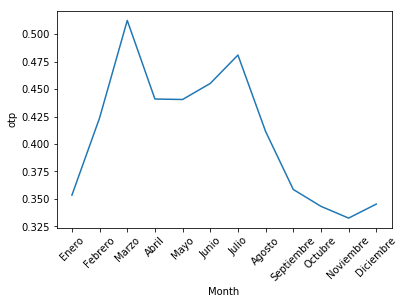

In [34]:
#Grafico OTP por mes
# Load dataframe.
mes = pd.read_csv('../results/mes/info-mes1998-2008.csv', sep=',')

#Create month column and groupby it
mes['fecha'] = "1/"+mes['fecha']
mes['fecha'] = pd.to_datetime(mes['fecha'],errors='coerce', format = '%d/%m/%Y')
mes['vuelos_atrasados'] = mes['atrasos_totales_arribo'] + mes['atrasos_totales_salida']
mes['Month'] = mes['fecha'].dt.month


aux = mes.groupby(by='Month', as_index=False).sum()[['Month','vuelos_atrasados','vuelos_totales']]
aux['Month']=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre','Noviembre', 'Diciembre']

aux['otp'] = aux['vuelos_atrasados']/aux['vuelos_totales']

g = sns.lineplot(x='Month',y='otp',data=aux)
plt.ylabel("otp")
g.set_xticklabels(aux['Month'],rotation=45)

fig = g.get_figure()
fig.savefig('../graficos/otp_por_mes.png')

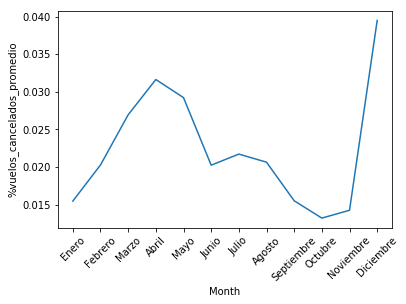

In [37]:
#Grafico Cancelaciones por mes
# Load dataframe.
mes = pd.read_csv('../results/mes/info-mes1998-2008.csv', sep=',')

#Create month column and groupby it
mes['fecha'] = "1/"+mes['fecha']
mes['fecha'] = pd.to_datetime(mes['fecha'],errors='coerce', format = '%d/%m/%Y')
mes['vuelos_atrasados'] = mes['atrasos_totales_arribo'] + mes['atrasos_totales_salida']
mes['Month'] = mes['fecha'].dt.month


aux = mes.groupby(by='Month', as_index=False).sum()[['Month','vuelos_cancelados','vuelos_totales']]
aux['Month']=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre','Noviembre', 'Diciembre']

aux['cancel'] = aux['vuelos_cancelados']/aux['vuelos_totales']

g = sns.lineplot(x='Month',y='cancel',data=aux)
plt.ylabel("%vuelos_cancelados_promedio")
g.set_xticklabels(aux['Month'],rotation=45)

fig = g.get_figure()
fig.savefig('../graficos/cancelaciones_por_mes.png')

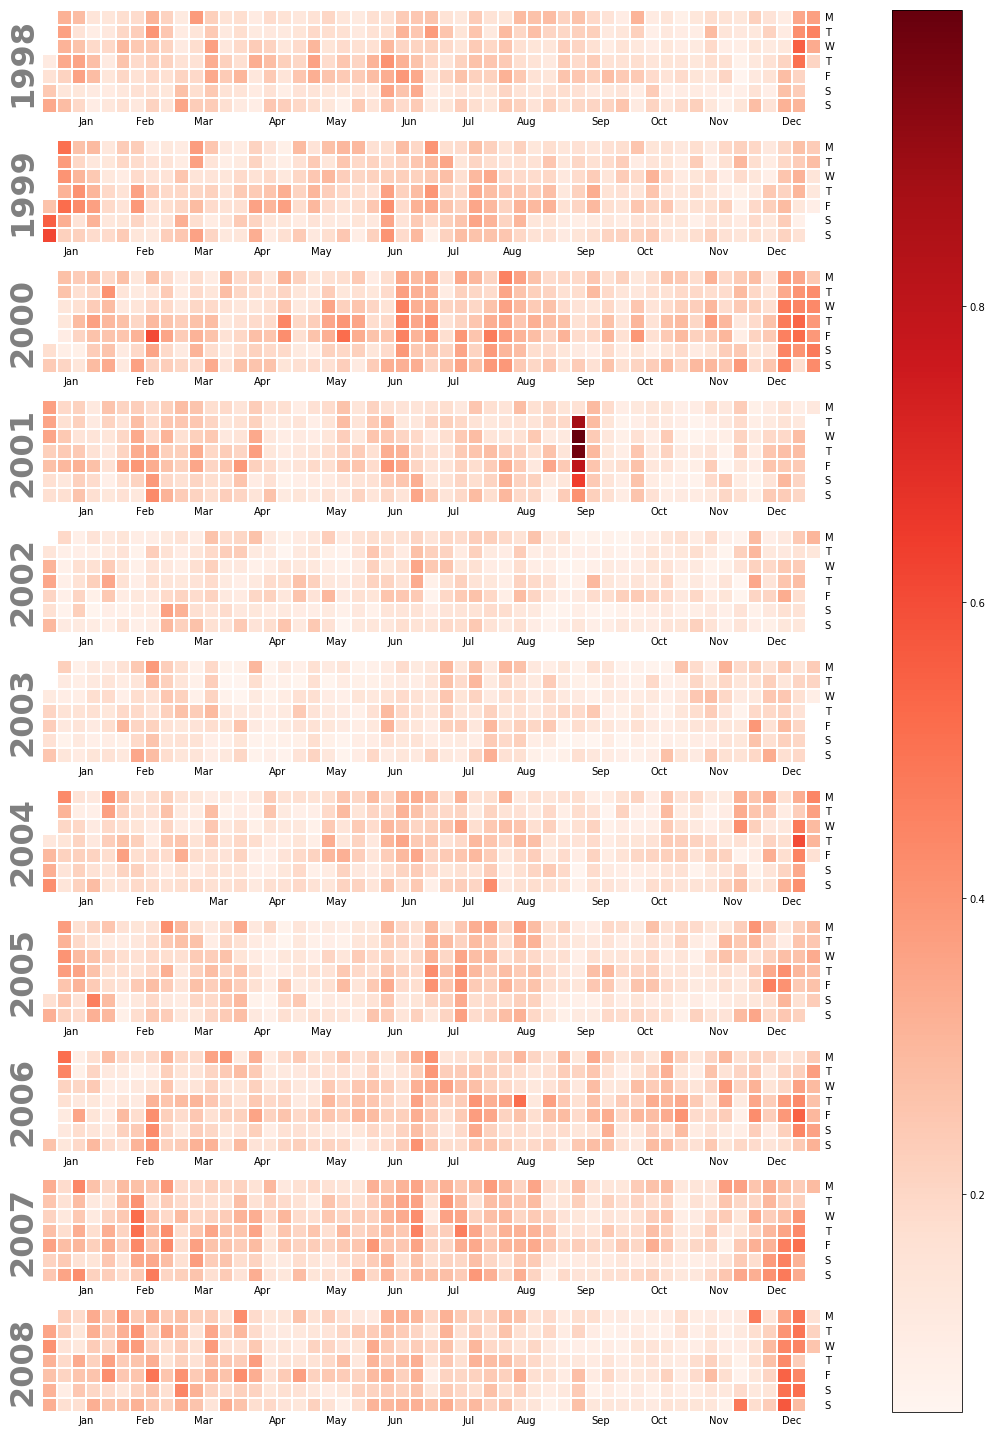

In [46]:
#Heatmap opt diario
dia = pd.read_csv('../results/dia/info_dia1998-2008.csv', sep=',')
dia['fecha'] = pd.to_datetime(dia['fecha'],errors='coerce', format = '%d/%m/%Y')
#dia['day'] = dia['fecha'].dt.day
#dia['year'] = dia['fecha'].dt.year
dia["otp"] = (dia["atrasos_totales_salida"]+dia["atrasos_totales_arribo"].astype(float)) / (2 * dia["vuelos_totales"].astype(float)) 


dia.sort_values(by=['fecha'], inplace=True)

dia.index = pd.DatetimeIndex(dia.fecha)
del dia['fecha']
del dia['vuelos_totales']
del dia['atrasos_totales_arribo']
del dia['atrasos_totales_salida']
del dia['vuelos_cancelados']
del dia['CarrierDelay']
del dia['WeatherDelay']
del dia['NASDelay']
del dia['SecurityDelay']
del dia['LateAircraftDelay  ']


df_calmap = pd.Series(dia['otp'])


#events = [dia['fecha'], dia['otp']]


fig, ax = calmap.calendarplot(df_calmap, yearlabels=True,daylabels='MTWTFSS', fig_kws=dict(figsize=(20, 20)),fillcolor='grey')
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

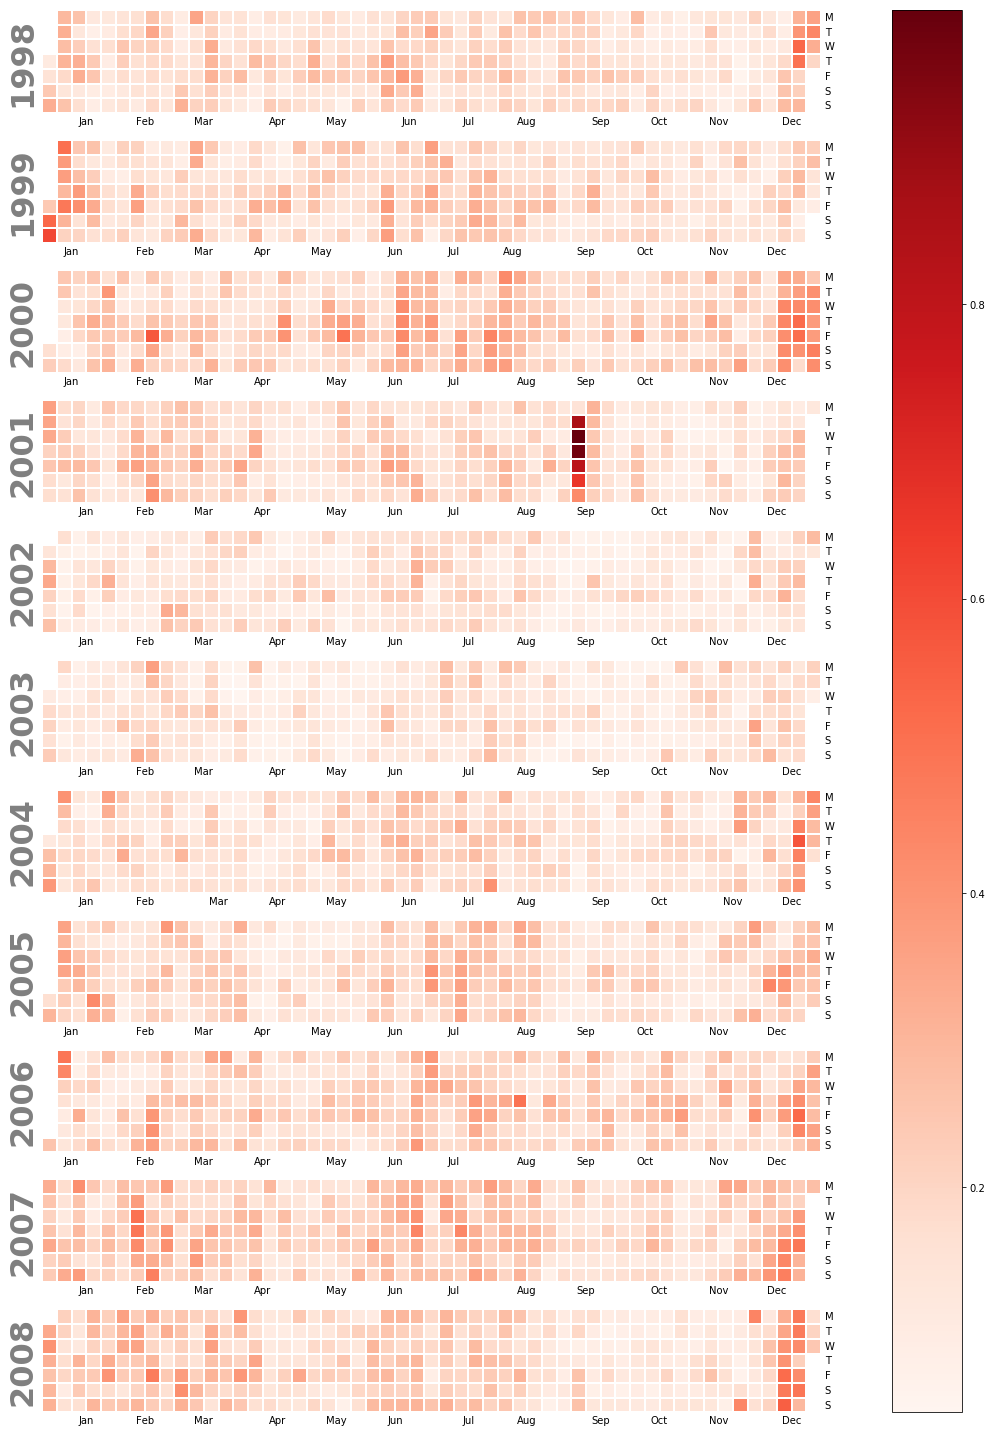

In [47]:
#Heatmap opt diario
dia = pd.read_csv('../results/dia/info_dia1998-2008.csv', sep=',')
dia['fecha'] = pd.to_datetime(dia['fecha'],errors='coerce', format = '%d/%m/%Y')
#dia['day'] = dia['fecha'].dt.day
#dia['year'] = dia['fecha'].dt.year
dia["otp"] = (dia["atrasos_totales_salida"].astype(float)) / (dia["vuelos_totales"].astype(float)) 


dia.sort_values(by=['fecha'], inplace=True)

dia.index = pd.DatetimeIndex(dia.fecha)
del dia['fecha']
del dia['vuelos_totales']
del dia['atrasos_totales_arribo']
del dia['atrasos_totales_salida']
del dia['vuelos_cancelados']
del dia['CarrierDelay']
del dia['WeatherDelay']
del dia['NASDelay']
del dia['SecurityDelay']
del dia['LateAircraftDelay  ']


df_calmap = pd.Series(dia['otp'])


#events = [dia['fecha'], dia['otp']]


fig, ax = calmap.calendarplot(df_calmap, yearlabels=True,daylabels='MTWTFSS', fig_kws=dict(figsize=(20, 20)),fillcolor='grey')
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())